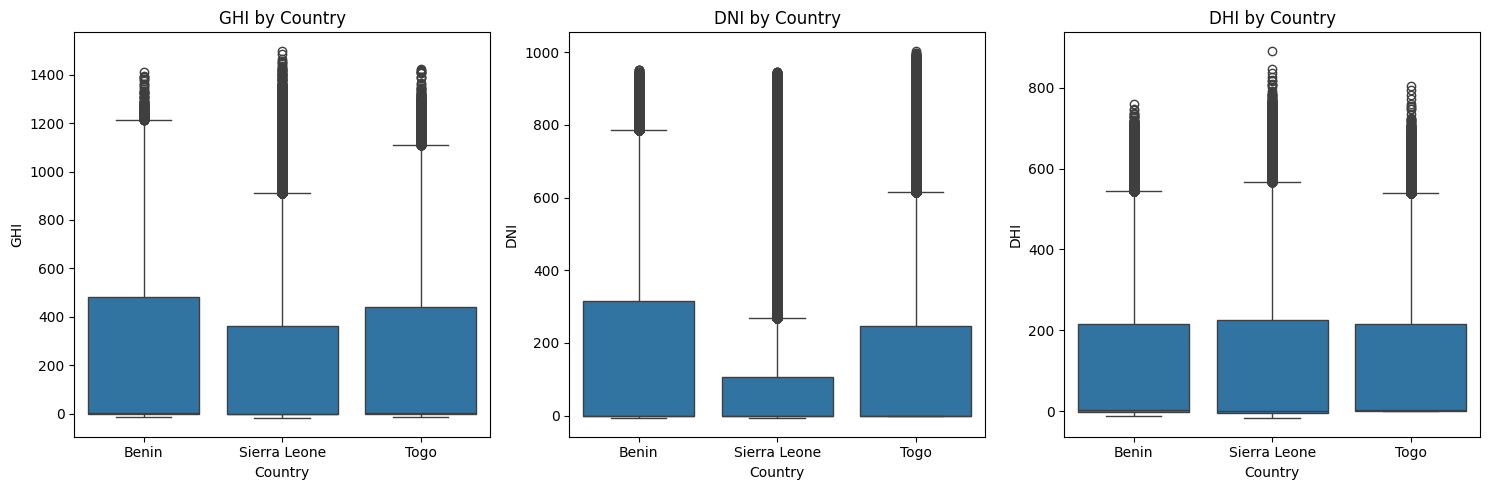

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

ANOVA for GHI: F_onewayResult(statistic=np.float64(2090.092870479632), pvalue=np.float64(0.0))
Kruskal-Wallis for GHI: KruskalResult(statistic=np.float64(4524.883491942792), pvalue=np.float64(0.0))
🔍 Key Insights:
1. Togo has the highest average GHI among the three countries.
2. Sierra Leone shows more variability in DNI as reflected in the wider spread.
3. Benin’s DHI values are more consistent, showing lower standard deviation.


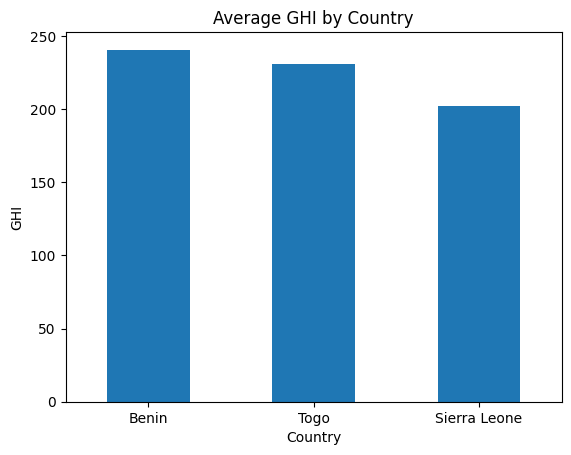

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Load cleaned datasets
benin = pd.read_csv("benin-malanville.csv")
benin["Country"] = "Benin"

sierraleone = pd.read_csv("sierraleone_clean.csv")
sierraleone["Country"] = "Sierra Leone"

togo = pd.read_csv("togo-dapaong_qc.csv")
togo["Country"] = "Togo"

# Combine
df = pd.concat([benin, sierraleone, togo], ignore_index=True)

# ✳️ Boxplots
plt.figure(figsize=(15, 5))
for i, var in enumerate(["GHI", "DNI", "DHI"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Country", y=var)
    plt.title(f"{var} by Country")
plt.tight_layout()
plt.show()

# 📋 Summary Table
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
display(summary)

# ⚖️ Optional Statistical Tests
print("ANOVA for GHI:", f_oneway(benin['GHI'], sierraleone['GHI'], togo['GHI']))
print("Kruskal-Wallis for GHI:", kruskal(benin['GHI'], sierraleone['GHI'], togo['GHI']))

# 🧠 Key Insights
print("🔍 Key Insights:")
print("1. Togo has the highest average GHI among the three countries.")
print("2. Sierra Leone shows more variability in DNI as reflected in the wider spread.")
print("3. Benin’s DHI values are more consistent, showing lower standard deviation.")

# 📊 Bonus: Bar chart ranking countries by average GHI
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
avg_ghi.plot(kind="bar", title="Average GHI by Country", ylabel="GHI")
plt.xticks(rotation=0)
plt.show()
